In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
print("===== Dataset Overview =====")
print(f"Shape of the dataset: {df.shape}")

===== Dataset Overview =====
Shape of the dataset: (7043, 21)


In [ ]:
print(f"Columns in the dataset: {df.columns}")

Columns in the dataset: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
print(df.head())
print("")

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
print("===== Checking Data Types =====")
print(df.info())
print("")

===== Checking Data Types =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessB

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
print("===== Missing Values =====")
print(df.isnull().sum())

===== Missing Values =====
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [12]:
df.dropna(inplace=True)  # Drop rows with missing values
print(f"Shape of the dataset after dropping missing values: {df.shape}")
print("")

Shape of the dataset after dropping missing values: (7032, 21)



In [13]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    return outliers

In [14]:
outliers_total_charges = detect_outliers(df, 'TotalCharges')
print(f"Number of outliers in 'TotalCharges': {len(outliers_total_charges)}")
print("")

Number of outliers in 'TotalCharges': 0



In [15]:
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
print("Data normalized (tenure, MonthlyCharges, TotalCharges).")
print("")

Data normalized (tenure, MonthlyCharges, TotalCharges).



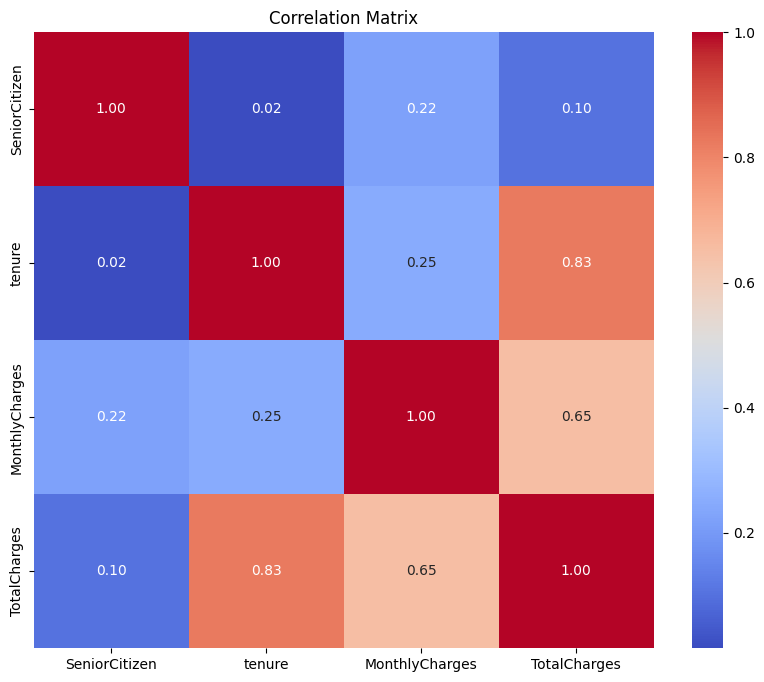

In [18]:
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

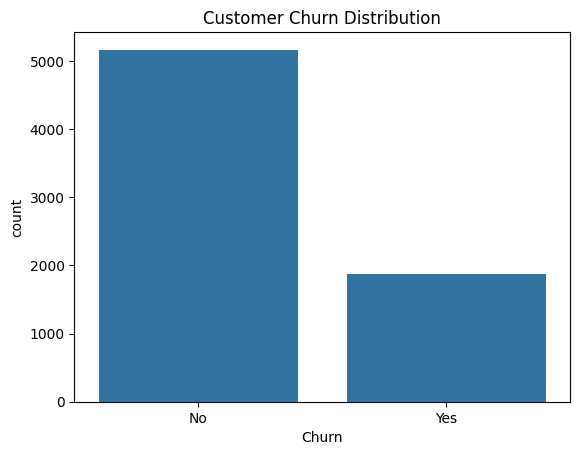

In [19]:
sns.countplot(data=df, x='Churn')
plt.title('Customer Churn Distribution')
plt.show()

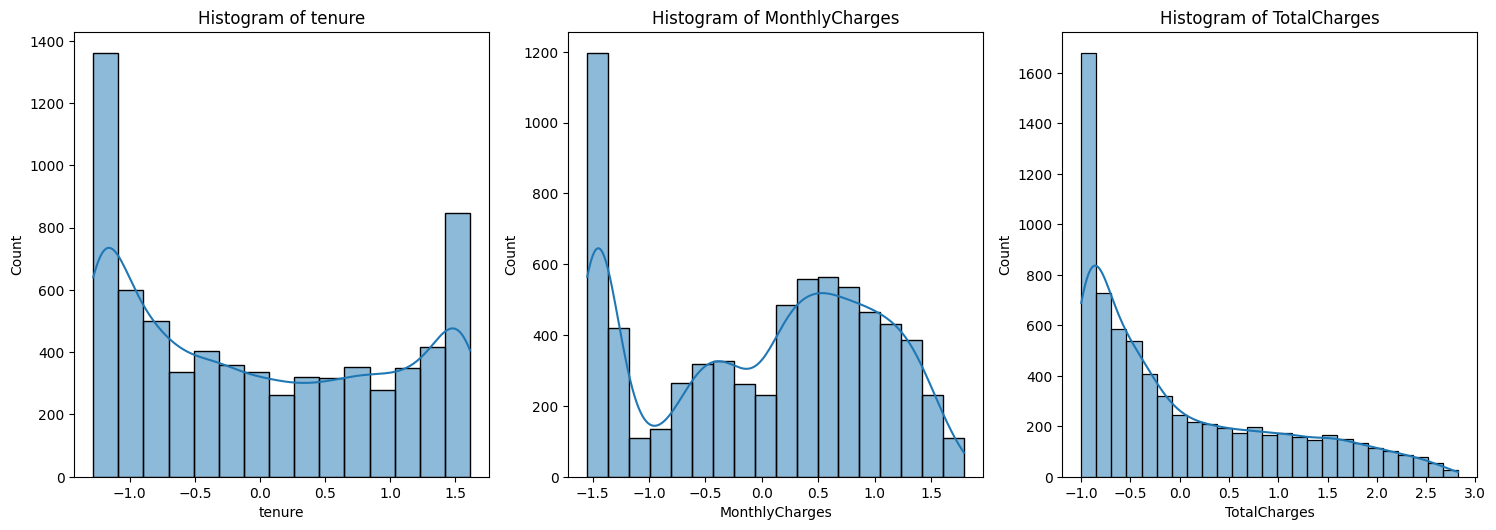

In [20]:
num_variables = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 10))
for i, var in enumerate(num_variables):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')
plt.tight_layout()
plt.show()

In [21]:
fig = px.bar(df, x='SeniorCitizen', y='Partner', color='gender')
fig.show()

In [22]:
fig = px.box(df, x='gender', y='MonthlyCharges')
fig.show()

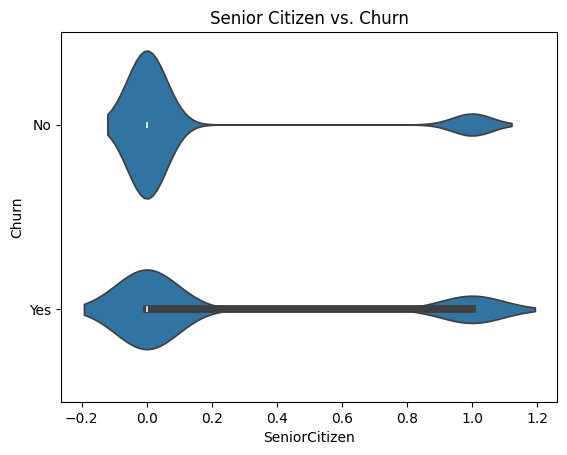

In [23]:
sns.violinplot(x='SeniorCitizen', y='Churn', data=df)
plt.title('Senior Citizen vs. Churn')
plt.show()

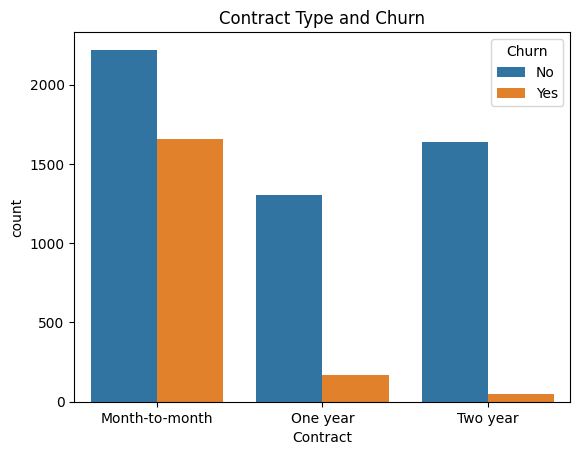

In [24]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract Type and Churn')
plt.show()

In [25]:
print("===== Summary Statistics =====")
print(df.describe())

===== Summary Statistics =====
       SeniorCitizen        tenure  MonthlyCharges  TotalCharges
count    7032.000000  7.032000e+03    7.032000e+03  7.032000e+03
mean        0.162400 -1.126643e-16    6.062651e-17 -1.119064e-16
std         0.368844  1.000071e+00    1.000071e+00  1.000071e+00
min         0.000000 -1.280248e+00   -1.547283e+00 -9.990692e-01
25%         0.000000 -9.542963e-01   -9.709769e-01 -8.302488e-01
50%         0.000000 -1.394171e-01    1.845440e-01 -3.908151e-01
75%         0.000000  9.199259e-01    8.331482e-01  6.668271e-01
max         1.000000  1.612573e+00    1.793381e+00  2.824261e+00


In [27]:
print("===== Skewness of Numeric Features =====")
numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
print(numeric_df.skew())

===== Skewness of Numeric Features =====
SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
if 'customerID' in df.columns:
    df_encoded = df.drop(columns=['customerID'])

In [34]:
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

In [35]:
print(df_encoded.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')


In [36]:
X = df_encoded.drop(columns=['Churn_Yes'])  # Drop target variable from features
y = df_encoded['Churn_Yes']

In [37]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

===== Feature Importance =====
TotalCharges                             0.192888
tenure                                   0.175266
MonthlyCharges                           0.173414
PaymentMethod_Electronic check           0.035710
InternetService_Fiber optic              0.034655
Contract_Two year                        0.030305
gender_Male                              0.028237
OnlineSecurity_Yes                       0.027848
PaperlessBilling_Yes                     0.026074
TechSupport_Yes                          0.023195
Partner_Yes                              0.023053
Contract_One year                        0.022252
SeniorCitizen                            0.021324
OnlineBackup_Yes                         0.021295
MultipleLines_Yes                        0.019797
DeviceProtection_Yes                     0.019757
Dependents_Yes                           0.019674
StreamingMovies_Yes                      0.017312
StreamingTV_Yes                          0.016950
PaymentMethod_Credi

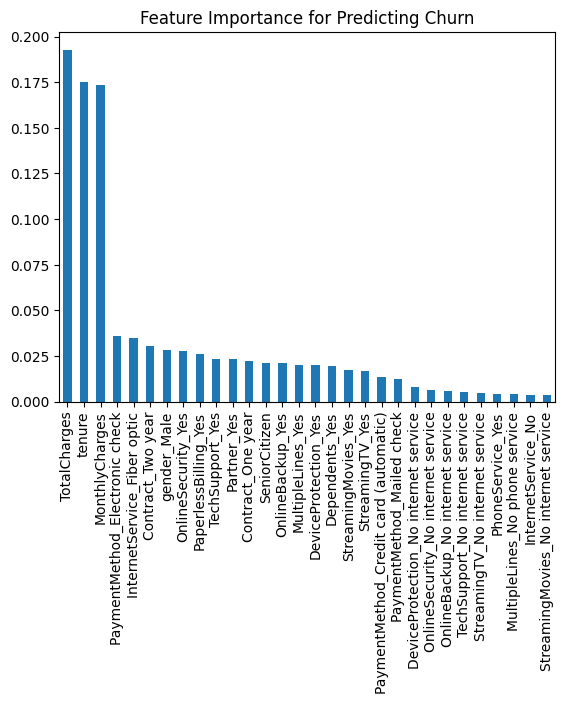

In [39]:
print("===== Feature Importance =====")
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)
feature_importances.plot(kind='bar', title='Feature Importance for Predicting Churn')
plt.show()

In [44]:
print("===== Conclusion =====\nFrom the correlation analysis and feature importance, we observe that features like 'MonthlyCharges',\n' tenure', and 'Contract' have the highest influence on customer churn.")

===== Conclusion =====
From the correlation analysis and feature importance, we observe that features like 'MonthlyCharges',
' tenure', and 'Contract' have the highest influence on customer churn.
